[[1058    0    0    0    0    0    0    0    0   25]
 [   0  960    0    0    0    0    0    2    0    0]
 [   0    0  937    0    0    0    0    0    0    0]
 [   0    0    0  942    0    0    0    0    0    0]
 [   0    0    0    0  963    7    0    0    0    0]
 [   0    0    0    0    0  969    0    0    0    0]
 [   0    0    0    0    0    0  947    0    0    0]
 [   9    0    0    0    0    0    0  965    0    0]
 [   0    0    0    0    0    0    0    0  969    0]
 [   4    0    0    0    0    0    0    0    0 1120]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1083
           1       1.00      1.00      1.00       962
           2       1.00      1.00      1.00       937
           3       1.00      1.00      1.00       942
           4       1.00      0.99      1.00       970
           5       0.99      1.00      1.00       969
           6       1.00      1.00      1.00       947
           7       1.00      0.99   

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

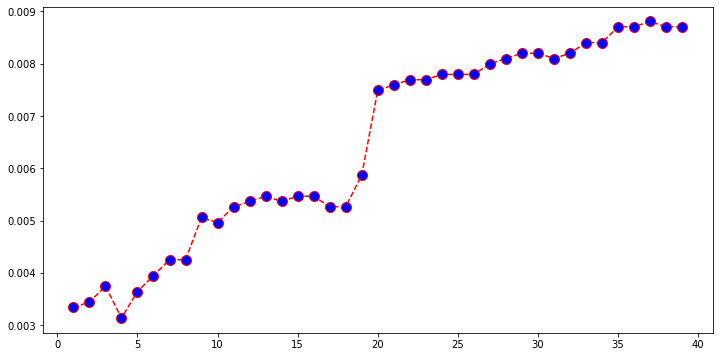

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

names = ['thumb', 'index', 'middle', 'ring', 'little', 'class']
dataset = pd.read_csv('fingerdata_forknn1.csv', names=names)
dataset_test = pd.read_csv('fingerdata.csv', names=names)
dataset_test = dataset_test.sample(frac=0.8)

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error1 = []

dataset = dataset.to_numpy()
dataset_test = dataset_test.to_numpy()

dataset.astype(float)
dataset_test = dataset_test.astype(float)
# Normalisation
dataset[:,0] = (dataset[:,0]-420)/(710-420)
dataset[:,1] = (dataset[:,1]-460)/(730-460)
dataset[:,2] = (dataset[:,2]-460)/(730-460)
dataset[:,3] = (dataset[:,3]-460)/(730-460)
dataset[:,4] = (dataset[:,4]-230)/(470-230)

dataset_test[:,0] = (dataset_test[:,0]-420)/(710-420)
dataset_test[:,1] = (dataset_test[:,1]-460)/(730-460)
dataset_test[:,2] = (dataset_test[:,2]-460)/(730-460)
dataset_test[:,3] = (dataset_test[:,3]-460)/(730-460)
dataset_test[:,4] = (dataset_test[:,4]-230)/(470-230)

dataset = pd.DataFrame(dataset)
dataset_test = pd.DataFrame(dataset_test)

dataset.astype('float64')
dataset_test = dataset_test.astype('float64')

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure()
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.legend(['scaled','unscaled'])
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)


print(error1)

In [2]:
dataset

,0,1,2,3,4,5
0,0.020690,0.166667,0.096296,0.092593,0.133333,0.0
1,0.172414,0.296296,0.340741,0.396296,0.179167,0.0
2,0.051724,0.162963,0.151852,0.040741,0.354167,0.0
3,0.062069,0.185185,0.196296,0.170370,0.204167,0.0
4,0.055172,0.177778,0.125926,0.148148,0.129167,0.0
...,...,...,...,...,...,...
1236,0.086207,0.181481,0.192593,0.233333,0.333333,9.0
1237,0.355172,0.274074,0.111111,0.162963,0.283333,9.0
1238,0.065517,0.162963,0.174074,0.200000,0.350000,9.0
1239,0.172414,0.277778,0.192593,0.185185,0.133333,9.0


In [3]:
dataset_test.astype('float64')

,0,1,2,3,4,5
0,0.979310,0.959259,0.970370,0.955556,0.141667,4.0
1,0.096552,0.185185,0.185185,0.207407,0.308333,9.0
2,0.365517,0.285185,0.881481,0.788889,0.583333,7.0
3,0.162069,0.281481,0.296296,0.370370,0.200000,0.0
4,0.979310,0.966667,0.988889,0.992593,0.120833,4.0
...,...,...,...,...,...,...
9872,0.482759,0.359259,0.325926,0.325926,0.808333,6.0
9873,0.275862,0.296296,0.303704,0.966667,0.708333,8.0
9874,0.089655,0.203704,0.203704,0.925926,0.354167,1.0
9875,0.093103,0.188889,0.181481,0.244444,0.308333,9.0


[[1073    0    0    0    0    0    0    0    0   26]
 [   0  964    0    0    0    0    0    0    0    0]
 [   0    0  952    0    0    0    0    0    0    0]
 [   0    0    0  936    0    0    1    0    0    0]
 [   0    0    0    0  940    7    0    0    0    0]
 [   0    0    0    0    0  973    0    0    0    0]
 [   0    0    0    0    0    0  950    0    0    0]
 [  15    0    0    0    0    0    0  933    0    0]
 [   0    0    0    0    0    0    0    0  946    0]
 [   4    0    0    0    0    0    0    0    0 1157]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1099
         1.0       1.00      1.00      1.00       964
         2.0       1.00      1.00      1.00       952
         3.0       1.00      1.00      1.00       937
         4.0       1.00      0.99      1.00       947
         5.0       0.99      1.00      1.00       973
         6.0       1.00      1.00      1.00       950
         7.0       1.00      0.98   

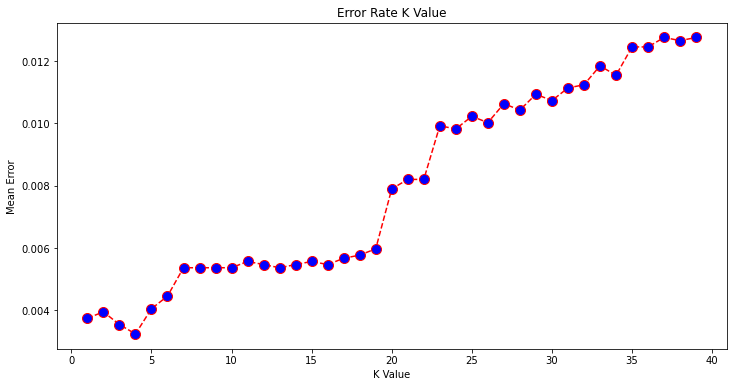

[0.003746076743950592, 0.003948567378758733, 0.003543586109142452, 0.003239850156930242, 0.004049812696162803, 0.004454793965779083, 0.005366001822415713, 0.005366001822415713, 0.005366001822415713, 0.005366001822415713, 0.005568492457223854, 0.005467247139819783, 0.005366001822415713, 0.005467247139819783, 0.005568492457223854, 0.005467247139819783, 0.005669737774627924, 0.0057709830920319935, 0.005973473726840134, 0.007897134757517466, 0.008200870709729675, 0.008200870709729675, 0.009922041105598866, 0.009820795788194796, 0.010225777057811076, 0.010023286423002936, 0.010630758327427357, 0.010428267692619217, 0.010934494279639566, 0.010732003644831426, 0.011136984914447708, 0.011238230231851777, 0.011845702136276197, 0.011541966184063987, 0.012453174040700617, 0.012453174040700617, 0.012756909992912827, 0.012655664675508757, 0.012756909992912827]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

names = ['thumb', 'index', 'middle', 'ring', 'little', 'class']
dataset = pd.read_csv('fingerdata_forknn1.csv', names=names)
dataset_test = pd.read_csv('fingerdata.csv', names=names)
dataset_test = dataset_test.sample(frac=0.8)

dataset = dataset.to_numpy()
dataset_test = dataset_test.to_numpy()

dataset.astype(float)
dataset_test = dataset_test.astype(float)
# Normalisation

dataset[:,0] = (dataset[:,0]-480)/(680-480)
dataset[:,1] = (dataset[:,1]-530)/(710-530)
dataset[:,2] = (dataset[:,2]-530)/(710-530)
dataset[:,3] = (dataset[:,3]-530)/(710-530)
dataset[:,4] = (dataset[:,4]-295)/(400-295)

dataset_test[:,0] = (dataset_test[:,0]-480)/(680-480)
dataset_test[:,1] = (dataset_test[:,1]-530)/(710-530)
dataset_test[:,2] = (dataset_test[:,2]-530)/(710-530)
dataset_test[:,3] = (dataset_test[:,3]-530)/(710-530)
dataset_test[:,4] = (dataset_test[:,4]-295)/(400-295)

dataset = pd.DataFrame(dataset)
dataset_test = pd.DataFrame(dataset_test)

dataset.astype('float64')
dataset_test = dataset_test.astype('float64')

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)

In [14]:
dataset_test

,0,1,2,3,4,5
0,-0.060,0.022222,-0.094444,-0.127778,-0.352381,9.0
1,0.830,1.077778,1.177778,1.055556,1.219048,5.0
2,0.900,1.061111,1.188889,1.061111,1.219048,5.0
3,-0.235,-0.144444,-0.166667,-0.344444,0.142857,0.0
4,0.065,0.122222,1.144444,1.022222,0.190476,2.0
...,...,...,...,...,...,...
9872,0.980,1.077778,-0.161111,-0.211111,0.057143,3.0
9873,0.995,1.083333,1.188889,1.061111,1.180952,5.0
9874,-0.080,0.011111,-0.111111,-0.105556,-0.428571,9.0
9875,1.095,1.066667,1.072222,1.088889,-0.276190,4.0


[[1034    0    0    0    0    0    0    0    0   25]
 [   0  950    0    0    0    0    0    2    0    0]
 [   0    0  965    0    0    0    0    0    0    0]
 [   0    0    0  927    0    0    0    0    0    0]
 [   0    0    0    0  958    8    0    0    0    0]
 [   0    0    0    0    0  975    0    0    0    0]
 [   0    0    0    0    0    0  957    0    0    0]
 [  10    0    0    0    0    0    0  927    0    0]
 [   0    0    0    0    0    0    0    0  973    0]
 [   2    0    0    0    0    0    0    0    0 1164]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1059
           1       1.00      1.00      1.00       952
           2       1.00      1.00      1.00       965
           3       1.00      1.00      1.00       927
           4       1.00      0.99      1.00       966
           5       0.99      1.00      1.00       975
           6       1.00      1.00      1.00       957
           7       1.00      0.99   

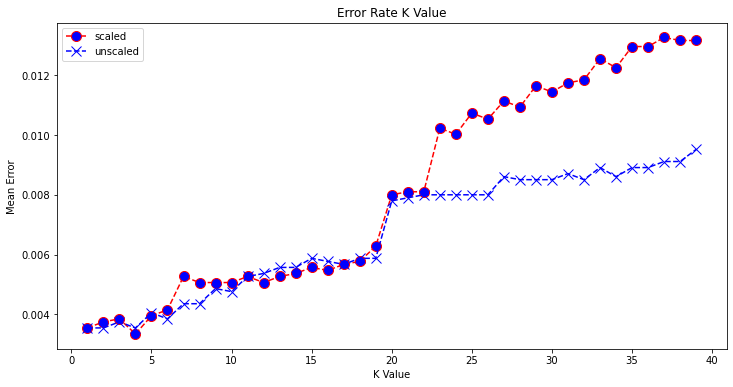

[0.003543586109142452, 0.003746076743950592, 0.0038473220613546625, 0.003341095474334312, 0.003948567378758733, 0.0041510580135668725, 0.005264756505011643, 0.005062265870203503, 0.005062265870203503, 0.005062265870203503, 0.005264756505011643, 0.005062265870203503, 0.005264756505011643, 0.005366001822415713, 0.005568492457223854, 0.005467247139819783, 0.005669737774627924, 0.0057709830920319935, 0.006277209679052344, 0.007998380074921535, 0.008099625392325605, 0.008099625392325605, 0.010225777057811076, 0.010023286423002936, 0.010732003644831426, 0.010529513010023287, 0.011136984914447708, 0.010934494279639566, 0.011643211501468057, 0.011440720866659917, 0.011744456818872127, 0.011845702136276197, 0.012554419358104687, 0.012250683405892478, 0.012959400627720968, 0.012959400627720968, 0.013263136579933178, 0.013161891262529108, 0.013161891262529108]
[0.003543586109142452, 0.003543586109142452, 0.003746076743950592, 0.003543586109142452, 0.004049812696162803, 0.0038473220613546625, 0.00

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

names = ['thumb', 'index', 'middle', 'ring', 'little', 'class']
dataset = pd.read_csv('fingerdata_forknn1.csv', names=names)
dataset_test = pd.read_csv('fingerdata.csv', names=names)
dataset_test = dataset_test.sample(frac=0.8)

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))


dataset = dataset.to_numpy()
dataset_test = dataset_test.to_numpy()

dataset.astype(float)
dataset_test = dataset_test.astype(float)
# Normalisation

dataset[:,0] = (dataset[:,0]-480)/(680-480)
dataset[:,1] = (dataset[:,1]-530)/(710-530)
dataset[:,2] = (dataset[:,2]-530)/(710-530)
dataset[:,3] = (dataset[:,3]-530)/(710-530)
dataset[:,4] = (dataset[:,4]-295)/(400-295)

dataset_test[:,0] = (dataset_test[:,0]-480)/(680-480)
dataset_test[:,1] = (dataset_test[:,1]-530)/(710-530)
dataset_test[:,2] = (dataset_test[:,2]-530)/(710-530)
dataset_test[:,3] = (dataset_test[:,3]-530)/(710-530)
dataset_test[:,4] = (dataset_test[:,4]-295)/(400-295)

dataset = pd.DataFrame(dataset)
dataset_test = pd.DataFrame(dataset_test)

dataset.astype('float64')
dataset_test = dataset_test.astype('float64')

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.legend(['scaled','unscaled'])
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error11.png', dpi=fig.dpi)
print(error)


print(error1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, 5].values
X_test = x_test
print("X_train is {}".format(X_train))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))


dataset = train.to_numpy()
#dataset_test = dataset_test.to_numpy()

#dataset.astype(float)
#dataset_test = dataset_test.astype(float)
# Normalisation
mean = np.mean(train, axis=0)

dataset[:,0] = (dataset[:,0]-420)/(710-420)
dataset[:,1] = (dataset[:,1]-460)/(730-460)
dataset[:,2] = (dataset[:,2]-460)/(730-460)
dataset[:,3] = (dataset[:,3]-460)/(730-460)
dataset[:,4] = (dataset[:,4]-230)/(470-230)

dataset_test[:,0] = (dataset_test[:,0]-420)/(710-420)
dataset_test[:,1] = (dataset_test[:,1]-460)/(730-460)
dataset_test[:,2] = (dataset_test[:,2]-460)/(730-460)
dataset_test[:,3] = (dataset_test[:,3]-460)/(730-460)
dataset_test[:,4] = (dataset_test[:,4]-230)/(470-230)

dataset = pd.DataFrame(dataset)
dataset_test = pd.DataFrame(dataset_test)

dataset.astype('float64')
dataset_test = dataset_test.astype('float64')

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.legend(['scaled','unscaled'])
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error12.png', dpi=fig.dpi)
print(error)


print(error1)

X_train is [[0.60997067 0.68035191 0.67253177 0.50048876 0.33528837]
 [0.51319648 0.5083089  0.514174   0.68719453 0.3030303 ]
 [0.514174   0.5200391  0.514174   0.66080156 0.30400782]
 ...
 [0.49071359 0.55229717 0.54545455 0.69794721 0.38807429]
 [0.67155425 0.67057674 0.71652004 0.49951124 0.29814272]
 [0.63245357 0.65786901 0.69208211 0.53176931 0.31964809]]
[[556   0   0   0   0   0   1   0   0  61]
 [  0 546   2   0   0   0   0   0   0   2]
 [  0   0 611   0   0   0   0   7   0   0]
 [  0   0   0 591   0   0   0   0   0   0]
 [  0   0   0   0 593   9   0   0   0   0]
 [  0   0   0   0   3 596   0   0   0   0]
 [  0   0   0   0   0   0 593   0   0   0]
 [  0   1   2   0   0   0   0 601   0   8]
 [  0   0   0   0   0   0   0   0 603   0]
 [ 32   1   0   0   0   0   0   0   0 581]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       618
           1       1.00      0.99      0.99       550
           2       0.99      0.99      0.

NameError: name 'dataset_test' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"   # Assign colum names to the dataset
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']    # Read dataset to pandas dataframe
#dataset = pd.read_csv(url, names=names)

x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, 5].values
X_test = x_test
print("X_train is {}".format(X_train))
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))


dataset = train.to_numpy()
#dataset_test = dataset_test.to_numpy()

#dataset.astype(float)
#dataset_test = dataset_test.astype(float)
# Normalisation
mean = np.mean(train, axis=0)

train = train-mean

dataset = pd.DataFrame(dataset)
dataset_test = pd.DataFrame(dataset_test)

dataset.astype('float64')
dataset_test = dataset_test.astype('float64')

X_train = dataset.iloc[:, :-1].values
y_train = dataset.iloc[:, 5].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, 5].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)    #20% for test


classifier = KNeighborsClassifier(n_neighbors=10)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10)
plt.legend(['scaled','unscaled'])
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error12.png', dpi=fig.dpi, transparent=True)
print(error)

print(error1)

X_train is [[-1.21684384 -1.31234185 -1.31236419 -1.27638753 -0.99832356]
 [-1.21714626 -1.3128334  -1.31281665 -1.2758689  -0.99848485]
 [-1.21714321 -1.31279989 -1.31281665 -1.27594222 -0.99847996]
 ...
 [-1.21721652 -1.31270772 -1.31272727 -1.27583904 -0.99805963]
 [-1.21665139 -1.31236978 -1.31223851 -1.27639025 -0.99850929]
 [-1.21677358 -1.31240609 -1.31230834 -1.27630064 -0.99840176]]


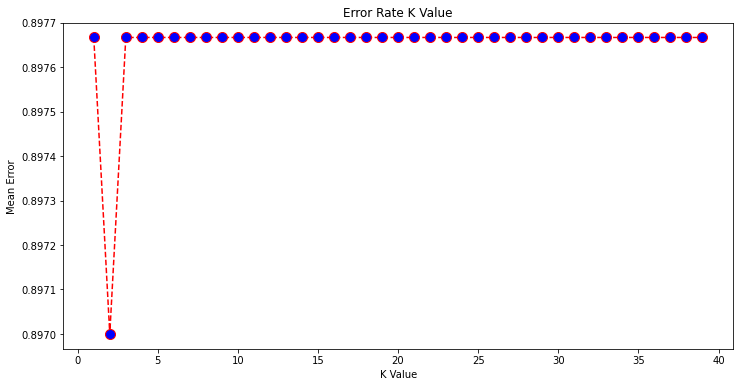

[0.8976666666666666, 0.897, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666, 0.8976666666666666]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
    
#data = np.empty([1,6])
x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, 5].values
#X_train1 = X_train
#X_test1 = X_test

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = x_test
#X_test = scaler.transform(X_test)

X_train[:,0] = (X_train[:,0]-390)/(710-390)
X_train[:,1] = (X_train[:,1]-460)/(750-400)
X_train[:,2] = (X_train[:,2]-460)/(750-400)
X_train[:,3] = (X_train[:,3]-460)/(750-390)
X_train[:,4] = (X_train[:,4]-200)/(430-230)

X_test[:,0] = (X_test[:,0]-390)/(710-390)
X_test[:,1] = (X_test[:,1]-460)/(750-400)
X_test[:,2] = (X_test[:,2]-460)/(750-400)
X_test[:,3] = (X_test[:,3]-460)/(750-390)
X_test[:,4] = (X_test[:,4]-200)/(430-230)

print("X_train is {}".format(X_train))
#print("X_train1 is {}".format(X_train1))

error = []
error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
    #knn1 = KNeighborsClassifier(n_neighbors=i)
    #knn1.fit(X_train1, y_train)
    #pred_i1 = knn.predict(X_test1)
    #error1.append(np.mean(pred_i1 != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Normalized data')
#plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
#         markerfacecolor='blue', markersize=10, label='Original data')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error12.png', dpi=fig.dpi, transparent=True)
print(error)

X_train is [[624. 696. 688. 512. 343.]
 [525. 520. 526. 703. 310.]
 [526. 532. 526. 676. 311.]
 ...
 [502. 565. 558. 714. 397.]
 [687. 686. 733. 511. 305.]
 [647. 673. 708. 544. 327.]]
[[492   0   0   0   0   0   2   6   0 118]
 [  0 545   3   0   0   0   0   0   0   2]
 [  0   0 611   0   0   0   0   7   0   0]
 [  0   0   0 591   0   0   0   0   0   0]
 [  0   0   0   0 591  11   0   0   0   0]
 [  0   0   0   0   3 596   0   0   0   0]
 [  0   0   0   0   0   0 593   0   0   0]
 [  0   1   4   0   0   0   0 596   0  11]
 [  0   0   0   0   0   0   0   0 603   0]
 [ 30   1   0   0   0   0   0   0   0 583]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       618
           1       1.00      0.99      0.99       550
           2       0.99      0.99      0.99       618
           3       1.00      1.00      1.00       591
           4       0.99      0.98      0.99       602
           5       0.98      0.99      0.99       599
     

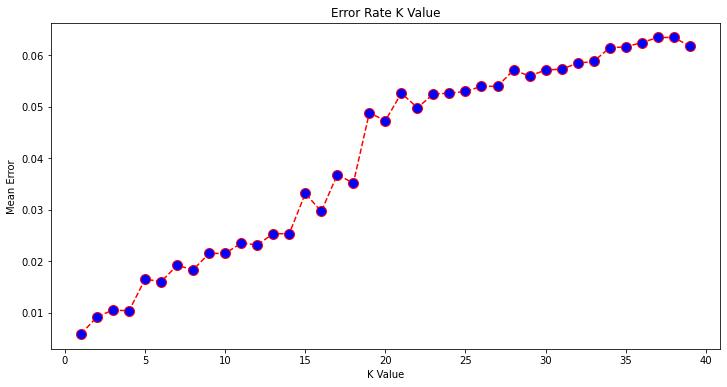

[0.005833333333333334, 0.009166666666666667, 0.0105, 0.010333333333333333, 0.0165, 0.016, 0.019166666666666665, 0.018333333333333333, 0.0215, 0.0215, 0.0235, 0.023166666666666665, 0.025333333333333333, 0.025333333333333333, 0.033166666666666664, 0.029666666666666668, 0.036833333333333336, 0.035166666666666666, 0.04883333333333333, 0.04733333333333333, 0.05266666666666667, 0.049833333333333334, 0.0525, 0.05266666666666667, 0.053, 0.054, 0.054, 0.057166666666666664, 0.056, 0.057166666666666664, 0.05733333333333333, 0.0585, 0.058833333333333335, 0.0615, 0.06166666666666667, 0.0625, 0.0635, 0.0635, 0.06183333333333333]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
    
#data = np.empty([1,6])
x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
X_train = X_train*1023
X_test = x_test
X_test = X_test*1023

y_train = train.iloc[:, 5].values

print("X_train is {}".format(X_train))



classifier = KNeighborsClassifier(n_neighbors=15)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)

X_train is [[0.73125    0.67428571 0.65142857 0.14444444 0.715     ]
 [0.421875   0.17142857 0.18857143 0.675      0.55      ]
 [0.425      0.20571429 0.18857143 0.6        0.555     ]
 ...
 [0.35       0.3        0.28       0.70555556 0.985     ]
 [0.928125   0.64571429 0.78       0.14166667 0.525     ]
 [0.803125   0.60857143 0.70857143 0.23333333 0.635     ]]
[[552   0   0   0   0   0   1   3   0  62]
 [  0 535  10   0   0   0   0   0   3   2]
 [  0   0 615   0   0   0   0   3   0   0]
 [  0   0   0 590   0   0   1   0   0   0]
 [  0   0   0   0 591  11   0   0   0   0]
 [  0   0   0   0   0 599   0   0   0   0]
 [  0   0   0   0   0   0 593   0   0   0]
 [  0   1   2   0   0   0   0 598   0  11]
 [  0   1   0   0   0   0   0   0 602   0]
 [ 33   1   0   0   0   0   0   0   0 580]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       618
           1       0.99      0.97      0.98       550
           2       0.98      1.00      0.

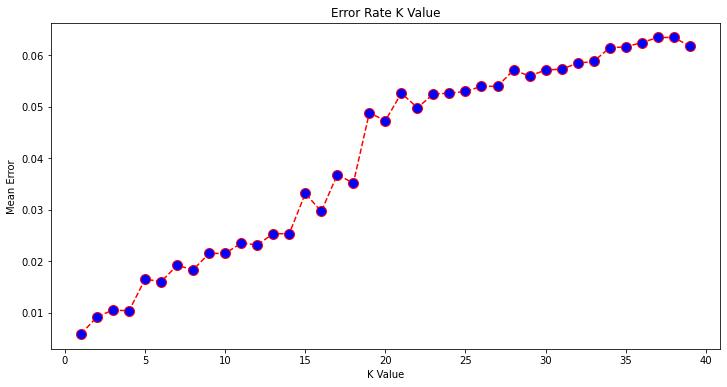

[0.005833333333333334, 0.009166666666666667, 0.0105, 0.010333333333333333, 0.0165, 0.016, 0.019166666666666665, 0.018333333333333333, 0.0215, 0.0215, 0.0235, 0.023166666666666665, 0.025333333333333333, 0.025333333333333333, 0.033166666666666664, 0.029666666666666668, 0.036833333333333336, 0.035166666666666666, 0.04883333333333333, 0.04733333333333333, 0.05266666666666667, 0.049833333333333334, 0.0525, 0.05266666666666667, 0.053, 0.054, 0.054, 0.057166666666666664, 0.056, 0.057166666666666664, 0.05733333333333333, 0.0585, 0.058833333333333335, 0.0615, 0.06166666666666667, 0.0625, 0.0635, 0.0635, 0.06183333333333333]


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
    
#data = np.empty([1,6])
x_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_train.npy')
x_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/x_test.npy')
y_train = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_train.npy')
y_test = np.load('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/train_test/y_test.npy')
train = pd.read_csv('/Users/sjzzj/OneDrive - Imperial College London/AML_lab/fingerData/knndata.csv')


X_train = train.iloc[:, :-1].values
X_train = X_train*1023
X_test = x_test
X_test = X_test*1023


X_train[:,0] = (X_train[:,0]-390)/(710-390)
X_train[:,1] = (X_train[:,1]-460)/(750-400)
X_train[:,2] = (X_train[:,2]-460)/(750-400)
X_train[:,3] = (X_train[:,3]-460)/(750-390)
X_train[:,4] = (X_train[:,4]-200)/(430-230)

X_test[:,0] = (X_test[:,0]-390)/(710-390)
X_test[:,1] = (X_test[:,1]-460)/(750-400)
X_test[:,2] = (X_test[:,2]-460)/(750-400)
X_test[:,3] = (X_test[:,3]-460)/(750-390)
X_test[:,4] = (X_test[:,4]-200)/(430-230)

y_train = train.iloc[:, 5].values

print("X_train is {}".format(X_train))


classifier = KNeighborsClassifier(n_neighbors=14)   #hyperparameter of KNN --- k
classifier.fit(X_train, y_train)       #training
y_pred = classifier.predict(X_test)   #prediction


#evaluation of the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


error1 = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error1.append(np.mean(pred_i != y_test))

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
fig.savefig('test_error9.png', dpi=fig.dpi)
print(error)

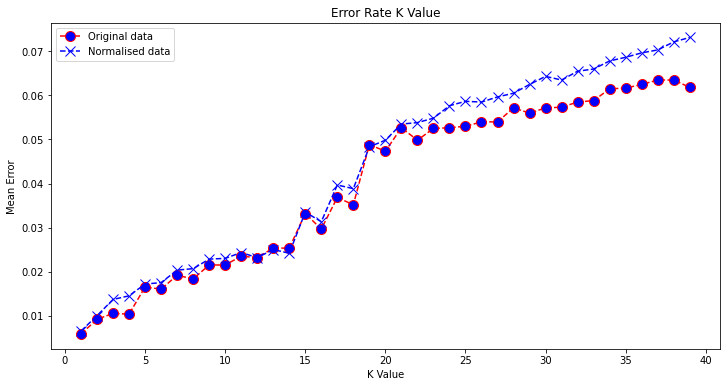

[0.005833333333333334, 0.009166666666666667, 0.0105, 0.010333333333333333, 0.0165, 0.016, 0.019166666666666665, 0.018333333333333333, 0.0215, 0.0215, 0.0235, 0.023166666666666665, 0.025333333333333333, 0.025333333333333333, 0.033166666666666664, 0.029666666666666668, 0.036833333333333336, 0.035166666666666666, 0.04883333333333333, 0.04733333333333333, 0.05266666666666667, 0.049833333333333334, 0.0525, 0.05266666666666667, 0.053, 0.054, 0.054, 0.057166666666666664, 0.056, 0.057166666666666664, 0.05733333333333333, 0.0585, 0.058833333333333335, 0.0615, 0.06166666666666667, 0.0625, 0.0635, 0.0635, 0.06183333333333333]


In [9]:

fig = plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label='Original data')
plt.plot(range(1, 40), error1, color='blue', linestyle='dashed', marker='x',
         markerfacecolor='blue', markersize=10, label='Normalised data')

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()
plt.show()
fig.savefig('fianlKNN.png', dpi=fig.dpi, transparent=True)
print(error)